# Практическая работа по курсу "Введение в численные методы"
### Выполнил: Иванов Роман

### Постановка задачи:
Найти решение задачи Коши
![title](picture1.png) 
методом Адамса второго порядка. Функция f(t) задана и может быть найдена как в точках сетки  
x = ih, i = 0,1, ... , N, h = L/N, так и в любой точке отрезка [0, l]  
а) Исследовать поведение решения на сгущающихся сетках (при увеличении n).  
б) Выяснить, будет ли сходимость.  

Вариант 4
![title](picture11.png) 

### Метод Адамса:
![title](picture5.png) 
![title](picture6.png) 
![title](picture7.png) 
![title](picture8.png) 
  
Отметим следующую особенность рекуррентной формулы (93) Для расчета очередного  
значения сеточной функции yi+1 нужно знать ее значения в двух предыдущих точках yi и yi-1.  
Таким образом, формула (93) начинает работать только со второй точки. Вычислить по ней y1  
нельзя. Это значение решения разностной задачи приходится вычислять каким-нибудь другим  
методом, например, методом Рунге-Кутта.  

### Программная реализация на python 3.6:
Рассмотрим вспомогательную функцию g(x) равную:
![title](picture15.png)
Исходная задача Коши сводится к нахождению функции g(x) с последующим решением задачи
Коши: du/dx = g(x), u(0)=u0  
Заметим, что dg/dx = e^(-(t-1)^2)  
Тогда g(0), т.е. ![title](picture17.png) равняется 0  
Для нахождения функции g(x) необходимо решить задачу Коши вида: dg/dx = e^(-(t-1)^2), g(0)=0  
  
Для этого задаём функцию:
![title](picture18.png)
Находим решение вспомогательной задачи Коши с помощью рекурентной формулы:
![title](picture19.png)
Находим решение исходной задачи Коши с помощью рекурентной формулы:
![title](picture20.png)

#### Инициализация параметров

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd

N = 20
a = 0
b = 1
U0 = 0

#### Реализация функции

In [2]:
def func(t):
    return math.exp(-(t-1)**2)

#### Создание таблицы значений функции

In [3]:
def table_of_values(a, b, N):
    h = (b-a)/N
    
    mas_point = [[0] * 2 for i in range(N)]
    
    for i in range(N):
        mas_point[i][0] = a + h*i
        mas_point[i][1] = func(a + h*i)
    
    return mas_point

In [4]:
TableXY = table_of_values(a, b, N)
pd.DataFrame(TableXY, columns=["x", "y"])

,x,y
0,0.00,0.367879
1,0.05,0.405555
2,0.10,0.444858
3,0.15,0.485537
4,0.20,0.527292
5,0.25,0.569783
6,0.30,0.612626
7,0.35,0.655406
8,0.40,0.697676
9,0.45,0.738968


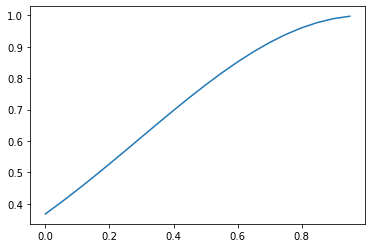

In [5]:
x = [TableXY[i][0] for i in range(N)]
y = [TableXY[i][1] for i in range(N)]

plt.plot(x, y)
plt.show()

#### Реализация метода Рунге-Кутта для вычисления одной точки

In [6]:
def Runge1(mas, a, b, N, U0):
    h = (b-a)/N
    return U0 + h/2*(mas[0][1] + mas[1][1])

#### Реализация метода Адамса

In [7]:
def Adams(mas, a, b, N, U0):
    h = (b-a)/N
    answer = [U0]
    answer.append(Runge1(mas, a, b, N, U0))
    
    for i in range(N-2):
        answer.append(answer[i+1] + h*(1.5*mas[i+1][1] - 0.5*mas[i][1]))
                      
    return answer

In [8]:
y = Adams(TableXY, a, b, N, U0)

for i in range(N):
    TableXY[i][1] = y[i]

y = Adams(TableXY, a, b, N, U0)

for i in range(N):
    TableXY[i][1] = y[i]

pd.DataFrame(TableXY, columns=["x", "y"])

,x,y
0,0.00,0.000000
1,0.05,0.000483
2,0.10,0.001934
3,0.15,0.004492
4,0.20,0.008262
5,0.25,0.013348
6,0.30,0.019857
7,0.35,0.027898
8,0.40,0.037577
9,0.45,0.049002


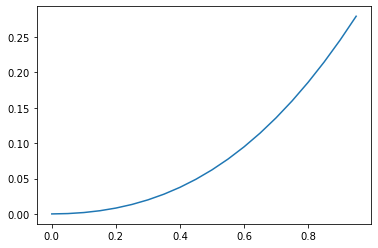

In [9]:
plt.plot(x, y)
plt.show()

#### Аналитическое решение, полученное с помощью Wolfram Alpha
![title](picture12.png) 

### Исследование поведения решения на сгущающихся сетках

### N = 40

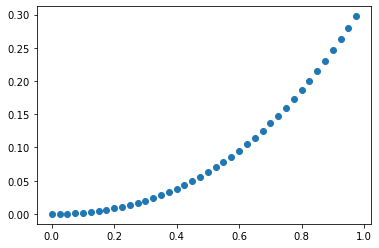

In [10]:
N = 40

TableXY = table_of_values(a, b, N)

x = [TableXY[i][0] for i in range(N)]
y = Adams(TableXY, a, b, N, U0)

for i in range(N):
    TableXY[i][1] = y[i]

y = Adams(TableXY, a, b, N, U0)

for i in range(N):
    TableXY[i][1] = y[i]

plt.scatter(x, y)

### N = 80

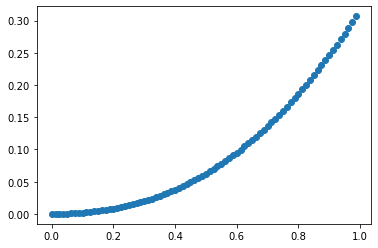

In [11]:
N = 80

TableXY = table_of_values(a, b, N)

x = [TableXY[i][0] for i in range(N)]
y = Adams(TableXY, a, b, N, U0)

for i in range(N):
    TableXY[i][1] = y[i]

y = Adams(TableXY, a, b, N, U0)

for i in range(N):
    TableXY[i][1] = y[i]

plt.scatter(x, y)

### N = 160

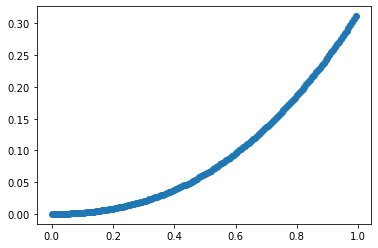

In [12]:
N = 160

TableXY = table_of_values(a, b, N)

x = [TableXY[i][0] for i in range(N)]
y = Adams(TableXY, a, b, N, U0)

for i in range(N):
    TableXY[i][1] = y[i]

y = Adams(TableXY, a, b, N, U0)

for i in range(N):
    TableXY[i][1] = y[i]

plt.scatter(x, y)

### Вывод
#### 1) При увеличении числа точек, точность растет
#### 1) Сходимость есть